In [38]:
%store - r tSNE_res
%store - r Iso
%store - r sample_df
%store - r sp_scaled

In [39]:
print(tSNE_res.shape)
print(Iso.shape)
print(sample_df.shape)
print(sp_scaled.shape)

(4992, 2)
(4992, 2)
(4992, 14)
(4992, 13)


## I. K-means

**I.1 with t-SNE**

In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = list()

K = range(1, 15)

for k in K:
    k_res = KMeans(n_clusters=k)
    k_res.fit(tSNE_res)
    distortions.append(k_res.inertia_)

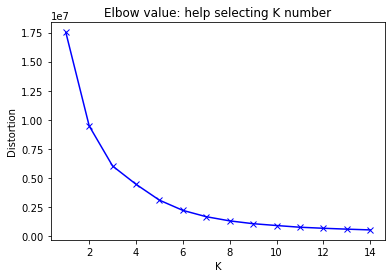

In [41]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow value: help selecting K number')

plt.show()

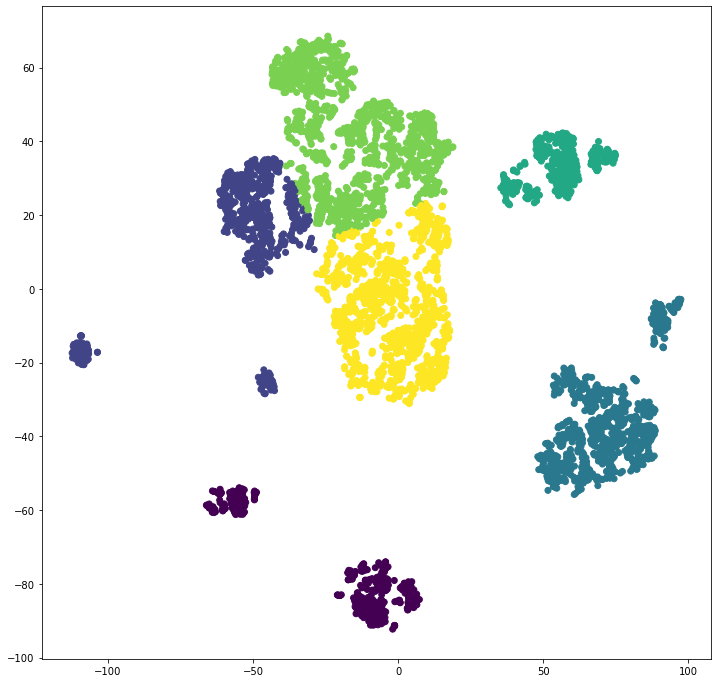

In [50]:
kmeans = KMeans(n_clusters=6, init='k-means++').fit(tSNE_res)
y_pred = kmeans.predict(tSNE_res)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.scatter(tSNE_res[:, 0], tSNE_res[:, 1], c=y_pred)

plt.show()

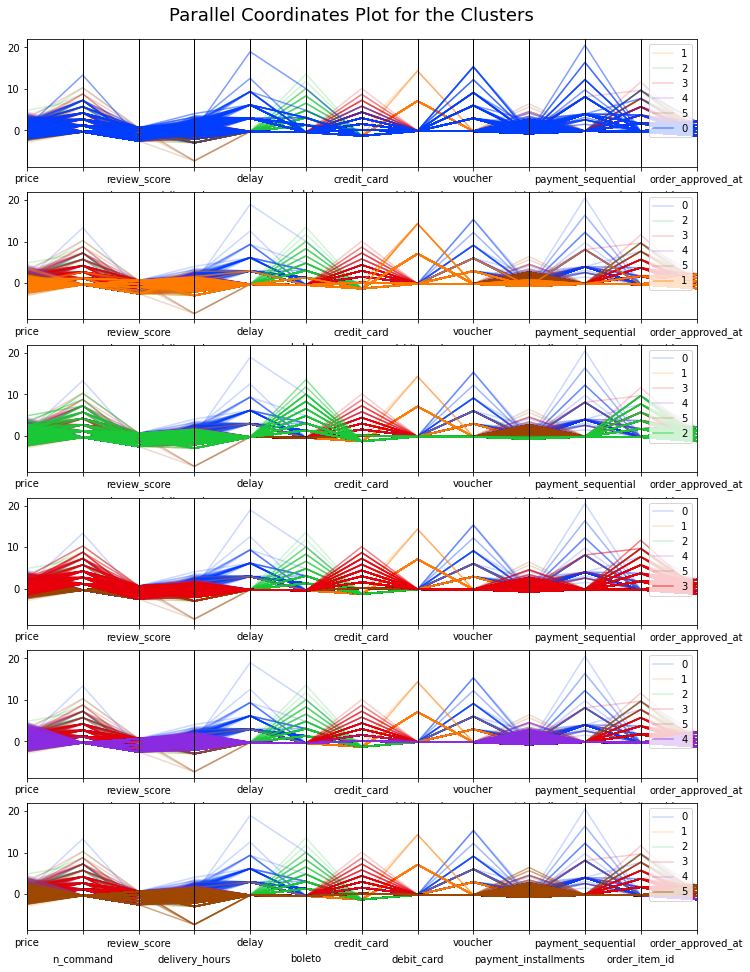

In [51]:
import pandas as pd

%run B_Support.ipynb

# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(
    sp_scaled, index=sample_df.iloc[:, 1:].index, columns=sample_df.iloc[:, 1:].columns)
X_clustered["cluster"] = y_pred

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_clustered, 6)

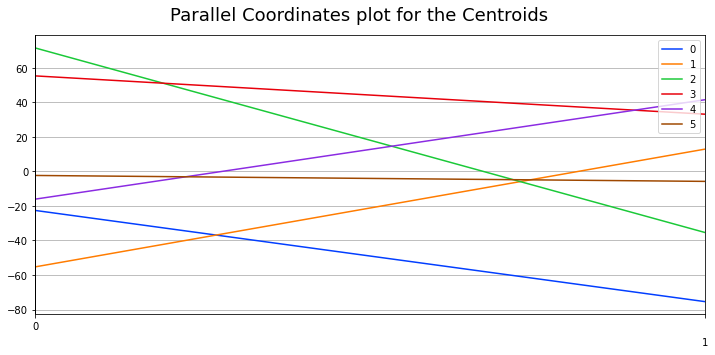

In [52]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 6)

In [53]:
from sklearn import metrics

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(tSNE_res, kmeans.labels_))

print("Davies Bouldin score: %0.3f"
      % metrics.davies_bouldin_score(tSNE_res, kmeans.labels_))

Silhouette Coefficient: 0.526
Davies Bouldin score: 0.644


**I.2 with Isomap**

In [4]:
distortions = list()

K = range(1, 15)

for k in K:
    k_res = KMeans(n_clusters=k)
    k_res.fit(Iso)
    distortions.append(k_res.inertia_)

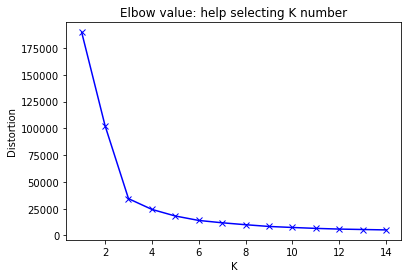

In [5]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow value: help selecting K number')

plt.show()

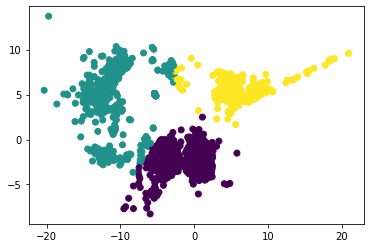

In [36]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(Iso)
y_pred = kmeans.predict(Iso)

plt.scatter(Iso[:, 0], Iso[:, 1], c=y_pred)
plt.show()

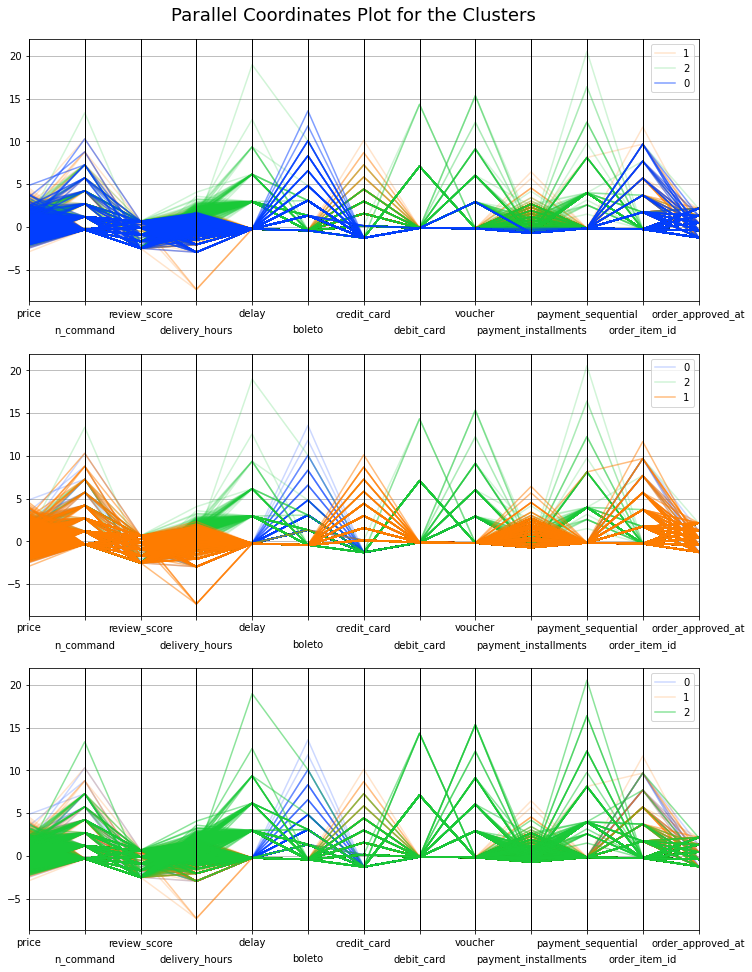

In [26]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(
    sp_scaled, index=sample_df.iloc[:, 1:].index, columns=sample_df.iloc[:, 1:].columns)
X_clustered["cluster"] = y_pred


# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_clustered, 3)

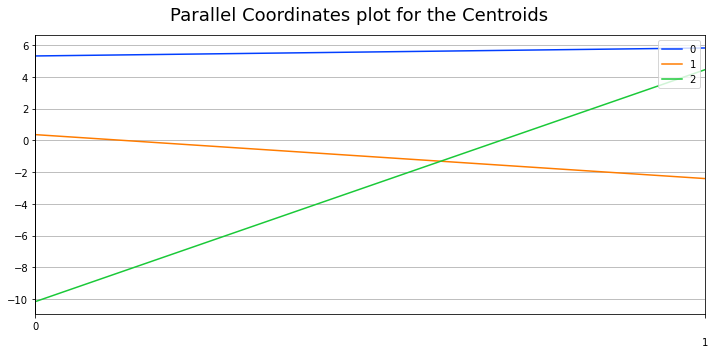

In [27]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 3)

In [37]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Iso, kmeans.labels_))

print("Davies Bouldin score: %0.3f"
      % metrics.davies_bouldin_score(Iso, kmeans.labels_))

Silhouette Coefficient: 0.733
Davies Bouldin score: 0.457


## II. Hierarchical clustering

**II.1 with t-SNE**

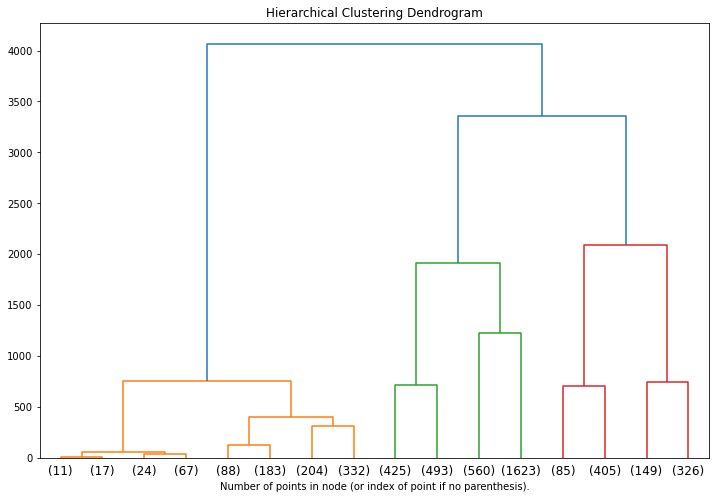

In [29]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(tSNE_res)

plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

**II.2 with Isomap**

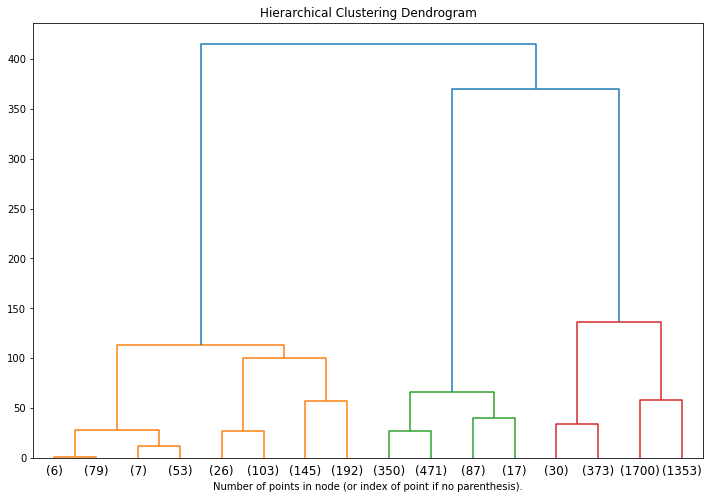

In [30]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(Iso)

plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

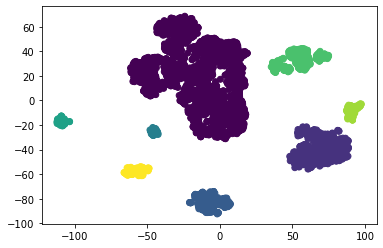

In [133]:
db_res = DBSCAN(eps=7, min_samples=2).fit_predict(tSNE_res)
plt.scatter(tSNE_res[:, 0], tSNE_res[:, 1], c=db_res)

plt.show()

In [135]:
yp = DBSCAN(eps=7, min_samples=2).fit(tSNE_res)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(tSNE_res, yp.labels_))

print("Davies Bouldin score: %0.3f"
      % metrics.davies_bouldin_score(tSNE_res, yp.labels_))

Silhouette Coefficient: 0.403
Davies Bouldin score: 0.456


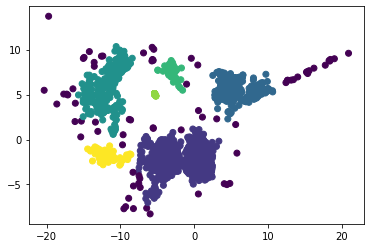

In [167]:
model = DBSCAN(eps=0.9, min_samples=6)
yp = model.fit(Iso)

plt.scatter(Iso[:, 0], Iso[:, 1], c=model.fit_predict(Iso))
plt.show()

In [168]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Iso, yp.labels_))

print("Davies Bouldin score: %0.3f"
      % metrics.davies_bouldin_score(Iso, yp.labels_))

Silhouette Coefficient: 0.707
Davies Bouldin score: 2.477
